In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# WARNING, FILE "flightdelay_data.csv" IS 1.37 GB

# delay_data = pd.read_csv("./Resources/flightdelay_data.csv", encoding = 'utf-8')
delay_data = pd.read_csv("./Resources/flightPGadmin.csv", encoding = 'utf-8')
delay = pd.DataFrame(delay_data)

# 1. Data Exploration

In [3]:
# Data type
delay.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AIRLINE_FLIGHTS_MONTH              int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX                               int64
AWND                             float64
LATITUDE        

In [4]:
delay.drop_duplicates()
delay

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,LATITUDE,LONGITUDE
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,NONE,0.0,0.0,0.0,65,2.91,36.080,-115.152
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,NONE,0.0,0.0,0.0,65,2.91,36.080,-115.152
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,NONE,0.0,0.0,0.0,65,2.91,36.080,-115.152
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,NONE,0.0,0.0,0.0,65,2.91,36.080,-115.152
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,NONE,0.0,0.0,0.0,65,2.91,36.080,-115.152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,0,1900-1959,3,2,7,76,"Midwest Airline, Inc.",3689,...,4,Indianapolis Muni/Weir Cook,Ronald Reagan Washington National,0.0,0.0,2.0,19,12.08,39.729,-86.282
99996,1,7,0,1300-1359,1,2,12,76,"Midwest Airline, Inc.",3689,...,11,Indianapolis Muni/Weir Cook,LaGuardia,0.0,0.0,2.0,19,12.08,39.729,-86.282
99997,1,7,1,1200-1259,3,2,5,44,American Eagle Airlines Inc.,3689,...,17,Indianapolis Muni/Weir Cook,LaGuardia,0.0,0.0,2.0,19,12.08,39.729,-86.282
99998,1,7,1,1200-1259,5,2,5,50,American Eagle Airlines Inc.,3689,...,14,Indianapolis Muni/Weir Cook,Miami International,0.0,0.0,2.0,19,12.08,39.729,-86.282


In [5]:
# Missing data
delay.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AIRLINE_FLIGHTS_MONTH            0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
LATITUDE                         0
LONGITUDE                        0
dtype: int64

In [6]:
# Number of unique values, and range
for col in delay.columns:
    print(f'"{col}" has {delay[col].nunique()} unique values, from {delay[col].min()} to {delay[col].max()}')

"MONTH" has 1 unique values, from 1 to 1
"DAY_OF_WEEK" has 7 unique values, from 1 to 7
"DEP_DEL15" has 2 unique values, from 0 to 1
"DEP_TIME_BLK" has 19 unique values, from 0001-0559 to 2300-2359
"DISTANCE_GROUP" has 11 unique values, from 1 to 11
"SEGMENT_NUMBER" has 13 unique values, from 1 to 13
"CONCURRENT_FLIGHTS" has 91 unique values, from 1 to 93
"NUMBER_OF_SEATS" has 77 unique values, from 44 to 337
"CARRIER_NAME" has 17 unique values, from Alaska Airlines Inc. to United Air Lines Inc.
"AIRPORT_FLIGHTS_MONTH" has 73 unique values, from 1134 to 30842
"AIRLINE_AIRPORT_FLIGHTS_MONTH" has 489 unique values, from 3 to 18809
"AIRLINE_FLIGHTS_MONTH" has 17 unique values, from 6713 to 107363
"AVG_MONTHLY_PASS_AIRPORT" has 73 unique values, from 89733 to 4365661
"AVG_MONTHLY_PASS_AIRLINE" has 17 unique values, from 473794 to 13382999
"FLT_ATTENDANTS_PER_PASS" has 14 unique values, from 0.0 to 0.000348407665605
"GROUND_SERV_PER_PASS" has 17 unique values, from 7.1346948724339e-06 to 0.

In [7]:
# Number of flights not delayed (0), and delayed (1)
delay['DEP_DEL15'].value_counts()

0    81211
1    18789
Name: DEP_DEL15, dtype: int64

In [8]:
# Number of airports
delay['DEPARTING_AIRPORT'].nunique()

73

In [9]:
# Number of flights per airport
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count()

DEPARTING_AIRPORT
Albuquerque International Sunport     169
Anchorage International                44
Atlanta Municipal                    5398
Austin - Bergstrom International      824
Birmingham Airport                    821
                                     ... 
Theodore Francis Green State          220
Tucson International                  286
Tulsa International                   101
Washington Dulles International       499
Will Rogers World                     309
Name: DEP_DEL15, Length: 73, dtype: int64

In [10]:
# Airport with least number of flights
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count().min()

44

In [11]:
# Grouped by airport: count of delay/on-time
print(delay.groupby(['DEPARTING_AIRPORT','DEP_DEL15'])['MONTH'].agg('count'))

DEPARTING_AIRPORT                  DEP_DEL15
Albuquerque International Sunport  0             154
                                   1              15
Anchorage International            0              37
                                   1               7
Atlanta Municipal                  0            4430
                                                ... 
Tulsa International                1              10
Washington Dulles International    0             407
                                   1              92
Will Rogers World                  0             275
                                   1              34
Name: MONTH, Length: 146, dtype: int64


### Distance group
1 to 11
Distance group to be flown by departing aircraft.

<AxesSubplot:>

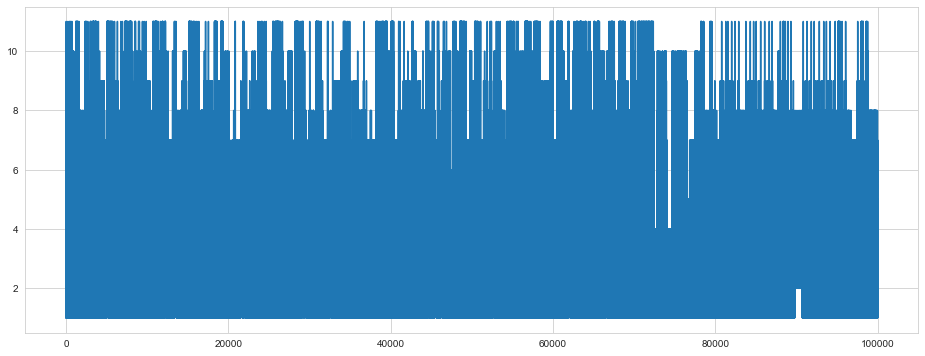

In [12]:
sns.set_style('whitegrid')
delay["DISTANCE_GROUP"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

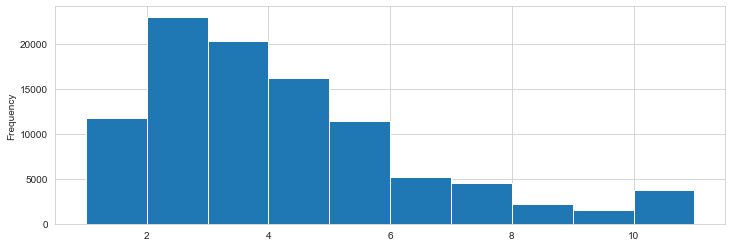

In [13]:
delay['DISTANCE_GROUP'].plot(kind='hist', figsize=(12, 4))

### Segment number
1 to 15
The segment that this tail number is on for the day.

<AxesSubplot:>

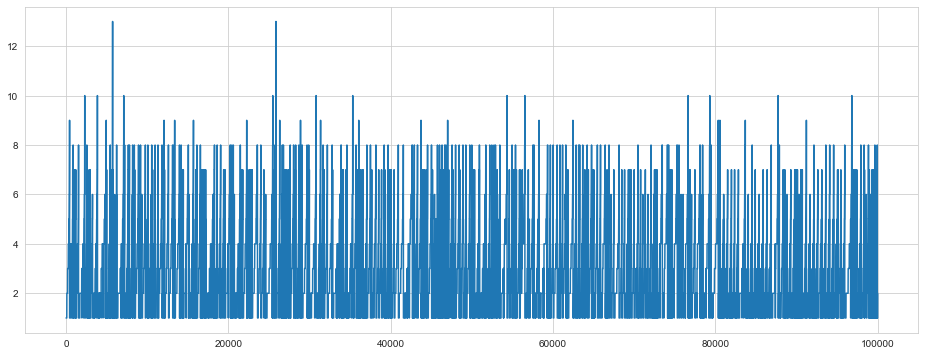

In [14]:
delay["SEGMENT_NUMBER"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

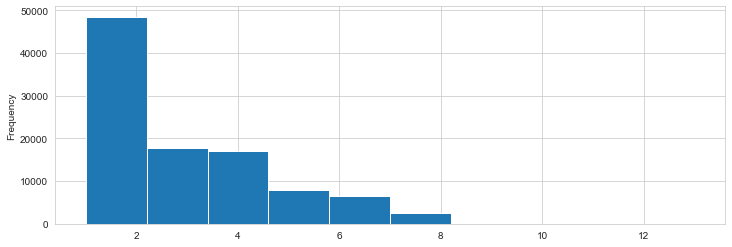

In [15]:
delay['SEGMENT_NUMBER'].plot(kind='hist', figsize=(12, 4))

### Concurrent flights

<AxesSubplot:>

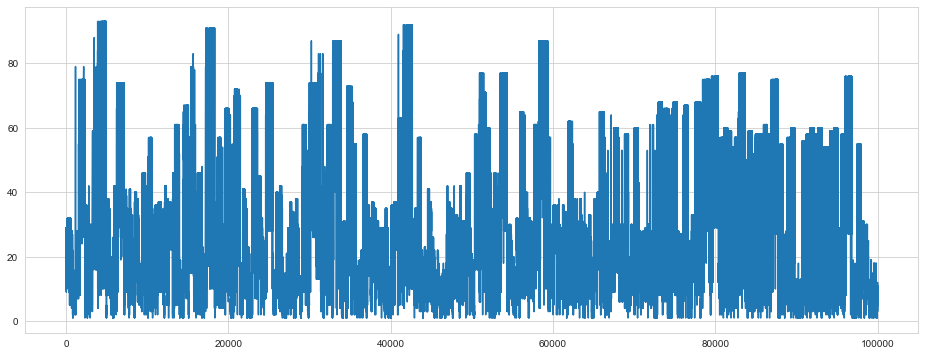

In [16]:
delay["CONCURRENT_FLIGHTS"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

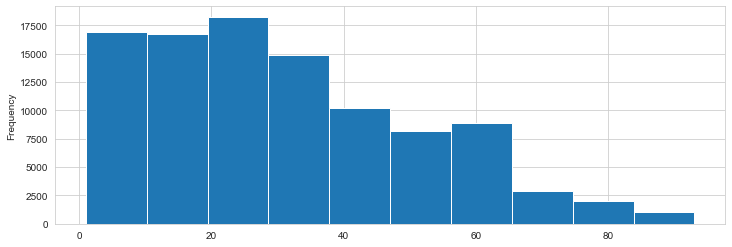

In [17]:
delay['CONCURRENT_FLIGHTS'].plot(kind='hist', figsize=(12, 4))

### Number of seats

<AxesSubplot:>

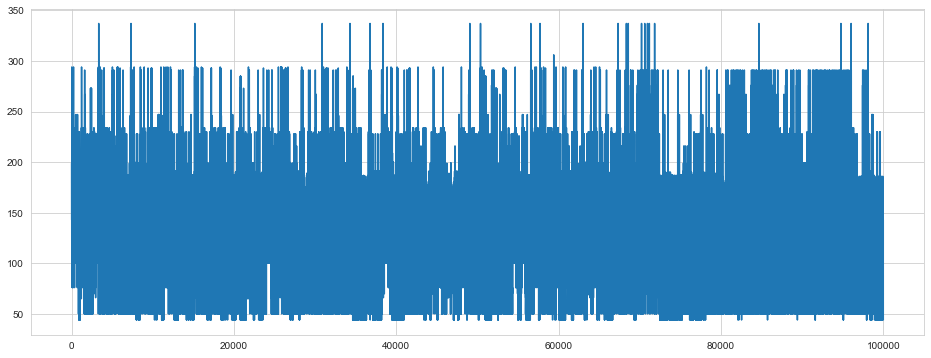

In [18]:
delay["NUMBER_OF_SEATS"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

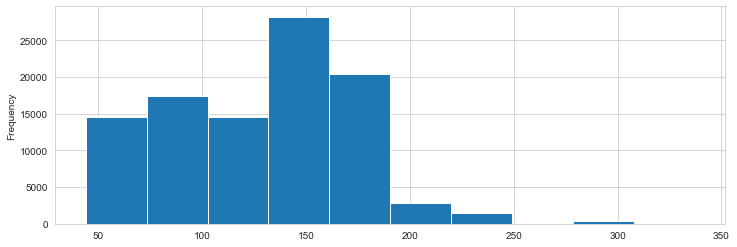

In [19]:
delay['NUMBER_OF_SEATS'].plot(kind='hist', figsize=(12, 4))

### Airport flights per month

<AxesSubplot:>

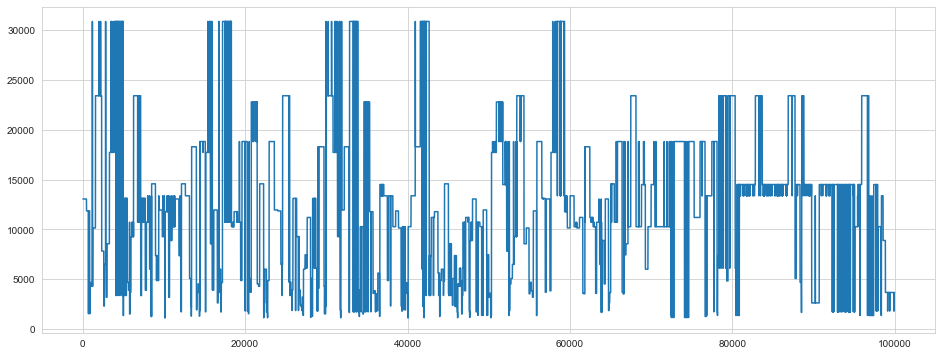

In [20]:
delay["AIRPORT_FLIGHTS_MONTH"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

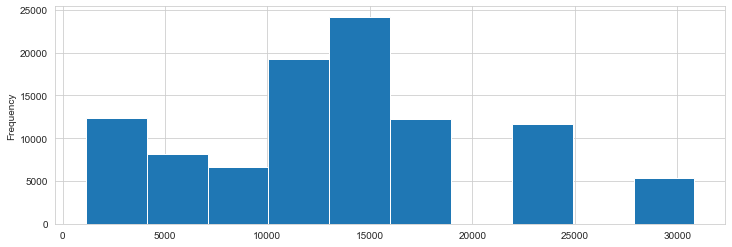

In [21]:
delay['AIRPORT_FLIGHTS_MONTH'].plot(kind='hist', figsize=(12, 4))

### Airline flights per month

<AxesSubplot:>

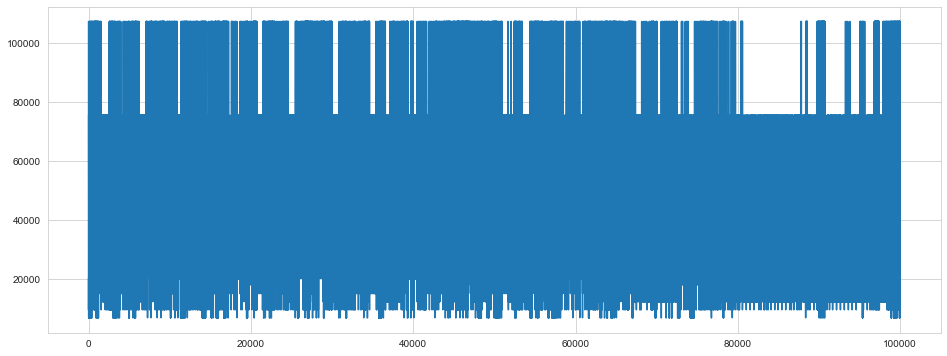

In [22]:
delay["AIRLINE_FLIGHTS_MONTH"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

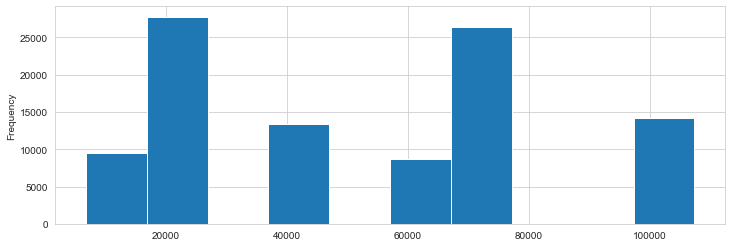

In [23]:
delay['AIRLINE_FLIGHTS_MONTH'].plot(kind='hist', figsize=(12, 4))

### Plane age

<AxesSubplot:>

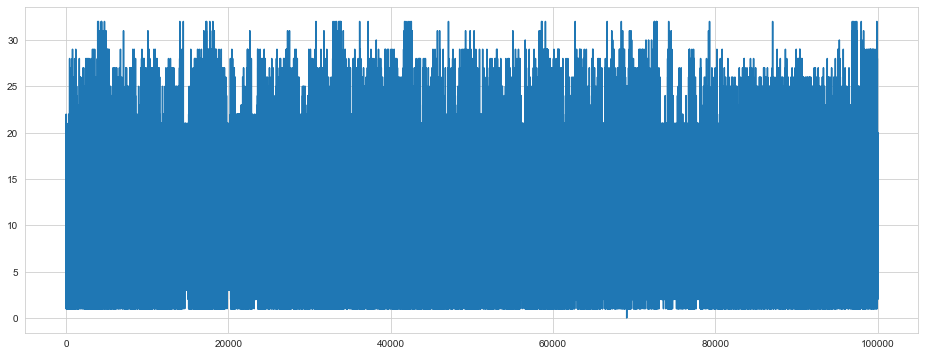

In [24]:
delay["PLANE_AGE"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

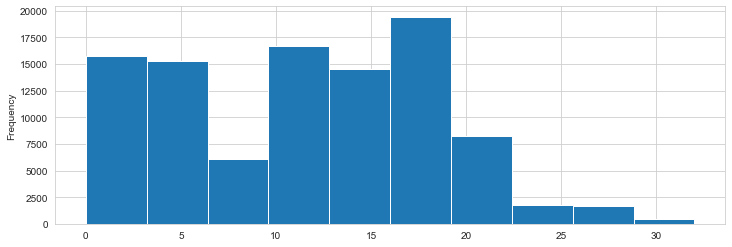

In [25]:
delay['PLANE_AGE'].plot(kind='hist', figsize=(12, 4))

### Departing airport

<AxesSubplot:xlabel='DEPARTING_AIRPORT'>

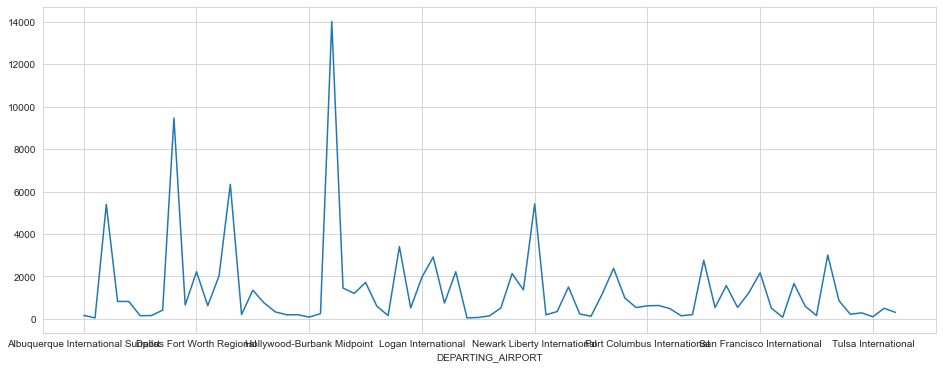

In [26]:
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count().plot(figsize=(16, 6))

### Previous airport

<AxesSubplot:xlabel='PREVIOUS_AIRPORT'>

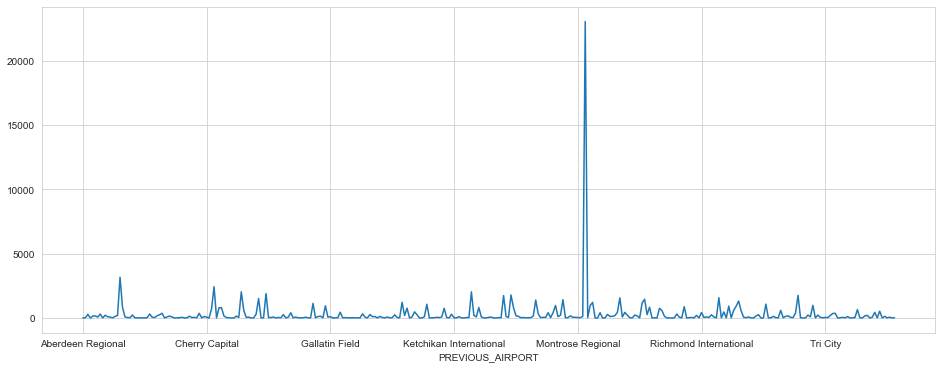

In [27]:
delay.groupby('PREVIOUS_AIRPORT')['DEP_DEL15'].count().plot(figsize=(16, 6))

### Precipitation

<AxesSubplot:>

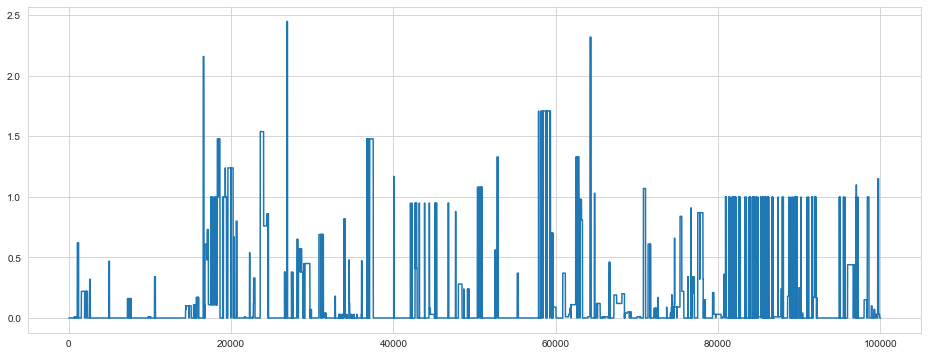

In [28]:
delay["PRCP"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

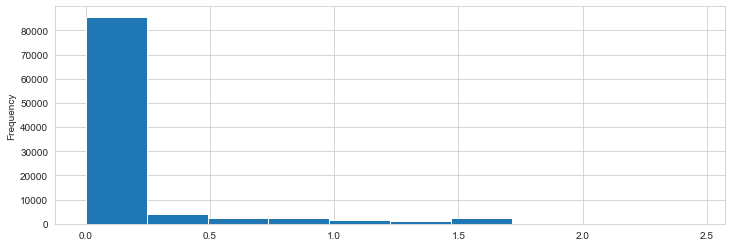

In [29]:
delay['PRCP'].plot(kind='hist', figsize=(12, 4))

### Snow (SNOW)
0 to 17.2
Inches of snowfall for day.

<AxesSubplot:>

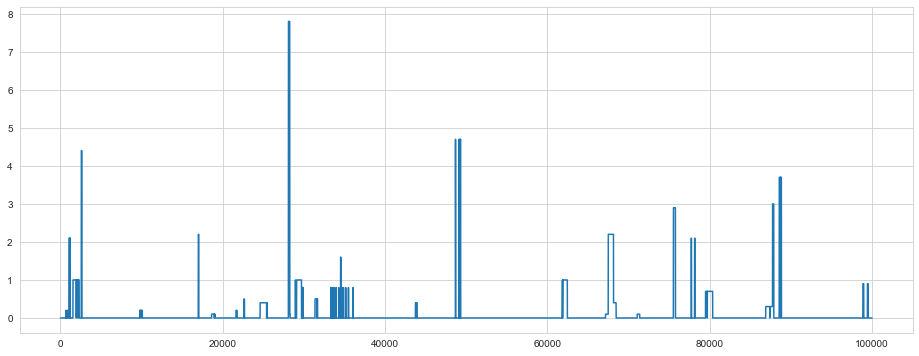

In [30]:
delay["SNOW"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

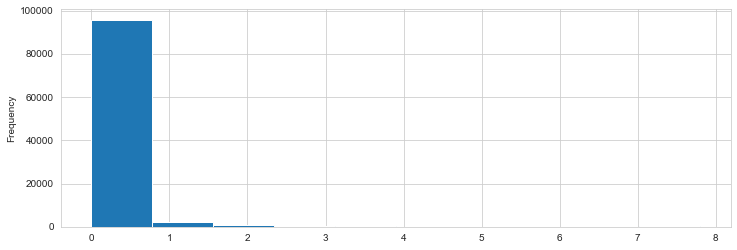

In [31]:
delay['SNOW'].plot(kind='hist', figsize=(12, 4))

### SNOWD
0 to 25.2
Inches of snow on ground for day.

<AxesSubplot:>

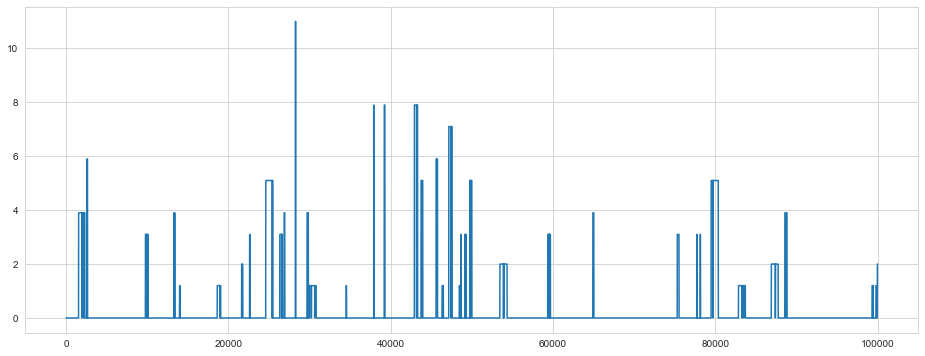

In [32]:
delay["SNWD"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

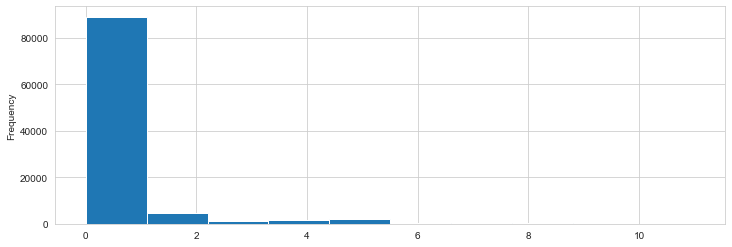

In [33]:
delay['SNWD'].plot(kind='hist', figsize=(12, 4))

### Temperature

<AxesSubplot:>

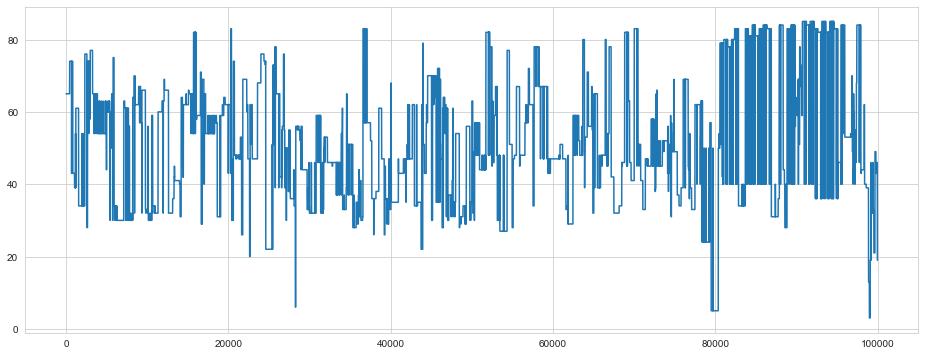

In [34]:
delay["TMAX"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

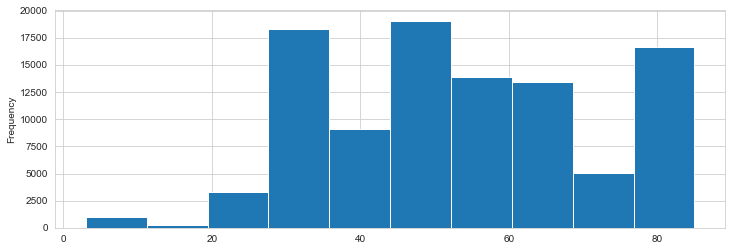

In [35]:
delay['TMAX'].plot(kind='hist', figsize=(12, 4))

### Air wind speed (AWND)
0 to 33.78
Max wind speed for day.

<AxesSubplot:>

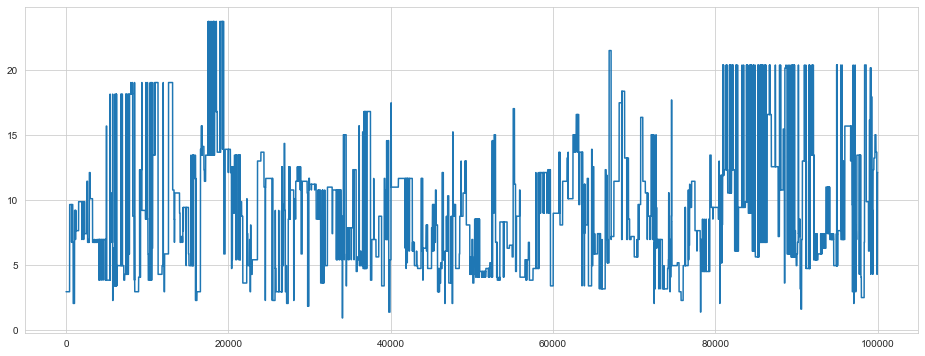

In [36]:
delay["AWND"].plot(figsize=(16, 6))

<AxesSubplot:ylabel='Frequency'>

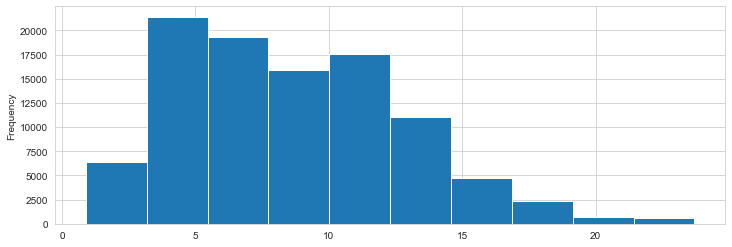

In [37]:
delay['AWND'].plot(kind='hist', figsize=(12, 4))

# 2. Data Cleanup

In [38]:
# Drop columns
delay_less_col = delay.drop(['AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
           'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
           'GROUND_SERV_PER_PASS', 'LATITUDE',
           'LONGITUDE', 'SNWD'], axis = 1)
delay_less_col

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,107363,8,McCarran International,NONE,0.0,0.0,65,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,73508,3,McCarran International,NONE,0.0,0.0,65,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,73508,18,McCarran International,NONE,0.0,0.0,65,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,73508,2,McCarran International,NONE,0.0,0.0,65,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,15023,1,McCarran International,NONE,0.0,0.0,65,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,0,1900-1959,3,2,7,76,"Midwest Airline, Inc.",3689,24623,4,Indianapolis Muni/Weir Cook,Ronald Reagan Washington National,0.0,0.0,19,12.08
99996,1,7,0,1300-1359,1,2,12,76,"Midwest Airline, Inc.",3689,24623,11,Indianapolis Muni/Weir Cook,LaGuardia,0.0,0.0,19,12.08
99997,1,7,1,1200-1259,3,2,5,44,American Eagle Airlines Inc.,3689,23760,17,Indianapolis Muni/Weir Cook,LaGuardia,0.0,0.0,19,12.08
99998,1,7,1,1200-1259,5,2,5,50,American Eagle Airlines Inc.,3689,23760,14,Indianapolis Muni/Weir Cook,Miami International,0.0,0.0,19,12.08


In [39]:
# Column MONTH
delay_less_col['MONTH'] = delay_less_col['MONTH'].apply(str)

In [40]:
dummies = pd.get_dummies(delay_less_col[["MONTH"]])
delay_month = pd.concat([delay_less_col.drop(['MONTH'],axis = 1), dummies],axis = 1)
delay_month.sample(5)

,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,AWND,MONTH_1
40659,1,0,1000-1059,1,3,30,110,Delta Air Lines Inc.,13375,73508,17,LaGuardia,Logan International,0.00,0.0,35,10.96,1
7695,5,0,0700-0759,2,1,7,143,Southwest Airlines Co.,3932,107363,13,Sacramento International,NONE,0.00,0.0,56,5.82,1
71777,4,0,0800-0859,10,1,30,124,United Air Lines Inc.,10281,46218,21,Newark Liberty International,NONE,0.00,0.0,45,8.72,1
71733,4,0,2000-2059,6,1,26,173,United Air Lines Inc.,10281,46218,5,Newark Liberty International,NONE,0.00,0.0,45,8.72,1
19728,4,0,0700-0759,9,2,54,187,American Airlines Inc.,18811,75506,7,Douglas Municipal,Newark Liberty International,1.24,0.0,62,13.87,1


In [41]:
delay_month.columns

Index(['DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'PLANE_AGE', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW',
       'TMAX', 'AWND', 'MONTH_1'],
      dtype='object')

In [42]:
# Column DAY_OF_WEEK
delay_month['DAY_OF_WEEK'] = delay_month['DAY_OF_WEEK'].apply(str)

In [43]:
dummies = pd.get_dummies(delay_month[["DAY_OF_WEEK"]])
delay_day_week = pd.concat([delay_month.drop(['DAY_OF_WEEK'],axis = 1), dummies],axis = 1)
delay_day_week.sample(5)

,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,...,TMAX,AWND,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
50162,0,1100-1159,2,2,7,129,Atlantic Southeast Airlines,3598,12231,11,...,32,3.58,1,1,0,0,0,0,0,0
26781,0,1900-1959,2,7,9,143,Southwest Airlines Co.,3932,107363,13,...,56,4.92,1,0,0,1,0,0,0,0
92937,0,1400-1459,5,3,56,128,American Airlines Inc.,14501,75506,19,...,82,5.82,1,0,0,0,1,0,0,0
12917,1,1500-1559,5,3,35,157,Delta Air Lines Inc.,13375,73508,27,...,32,19.01,1,0,0,0,0,1,0,0
83917,1,1900-1959,4,2,27,154,United Air Lines Inc.,14501,46218,20,...,83,9.84,1,0,0,0,0,0,1,0


In [44]:
# Column DEP_TIME_BLK

# It is already a string, does not need any transformation
# delay_day_week['DEP_TIME_BLK'] = delay_day_week['DEP_TIME_BLK'].apply(str)

In [45]:
dummies = pd.get_dummies(delay_day_week[["DEP_TIME_BLK"]])
delay_time = pd.concat([delay_day_week.drop(['DEP_TIME_BLK'],axis = 1), dummies],axis = 1)
delay_time.sample(5)

,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,...,DEP_TIME_BLK_1400-1459,DEP_TIME_BLK_1500-1559,DEP_TIME_BLK_1600-1659,DEP_TIME_BLK_1700-1759,DEP_TIME_BLK_1800-1859,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359
5401,0,4,5,20,76,SkyWest Airlines Inc.,13115,62105,2,San Francisco International,...,0,0,0,0,0,1,0,0,0,0
98166,0,5,2,22,162,JetBlue Airways,10281,23463,18,Newark Liberty International,...,0,0,0,0,0,0,0,0,0,0
21106,0,7,3,26,181,Alaska Airlines Inc.,22775,20315,1,Dallas Fort Worth Regional,...,0,0,0,0,0,1,0,0,0,0
32686,0,4,4,46,50,SkyWest Airlines Inc.,18286,62105,19,Stapleton International,...,0,1,0,0,0,0,0,0,0,0
49714,0,2,6,25,50,SkyWest Airlines Inc.,11956,62105,16,Minneapolis-St Paul International,...,1,0,0,0,0,0,0,0,0,0


In [46]:
# Column DISTANCE_GROUP
# Splitting the Column into Four Quantiles
delay_time['DISTANCE_GROUP_Groups'] = pd.qcut(delay_time['DISTANCE_GROUP'], 4)
delay_time.drop('DISTANCE_GROUP', axis = 1, inplace = True)
delay_time

,DEP_DEL15,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,...,DEP_TIME_BLK_1500-1559,DEP_TIME_BLK_1600-1659,DEP_TIME_BLK_1700-1759,DEP_TIME_BLK_1800-1859,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359,DISTANCE_GROUP_Groups
0,0,1,25,143,Southwest Airlines Co.,13056,107363,8,McCarran International,NONE,...,0,0,0,0,0,0,0,0,0,"(0.999, 2.0]"
1,0,1,29,191,Delta Air Lines Inc.,13056,73508,3,McCarran International,NONE,...,0,0,0,0,0,0,0,0,0,"(5.0, 11.0]"
2,0,1,27,199,Delta Air Lines Inc.,13056,73508,18,McCarran International,NONE,...,0,0,0,0,0,0,0,0,0,"(5.0, 11.0]"
3,0,1,27,180,Delta Air Lines Inc.,13056,73508,2,McCarran International,NONE,...,0,0,0,0,0,0,0,0,0,"(5.0, 11.0]"
4,0,1,10,182,Spirit Air Lines,13056,15023,1,McCarran International,NONE,...,0,0,0,0,0,0,0,0,0,"(5.0, 11.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,2,7,76,"Midwest Airline, Inc.",3689,24623,4,Indianapolis Muni/Weir Cook,Ronald Reagan Washington National,...,0,0,0,0,1,0,0,0,0,"(2.0, 3.0]"
99996,0,2,12,76,"Midwest Airline, Inc.",3689,24623,11,Indianapolis Muni/Weir Cook,LaGuardia,...,0,0,0,0,0,0,0,0,0,"(0.999, 2.0]"
99997,1,2,5,44,American Eagle Airlines Inc.,3689,23760,17,Indianapolis Muni/Weir Cook,LaGuardia,...,0,0,0,0,0,0,0,0,0,"(2.0, 3.0]"
99998,1,2,5,50,American Eagle Airlines Inc.,3689,23760,14,Indianapolis Muni/Weir Cook,Miami International,...,0,0,0,0,0,0,0,0,0,"(3.0, 5.0]"


In [47]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_time[["DISTANCE_GROUP_Groups"]])
delay_distance = pd.concat([delay_time.drop(['DISTANCE_GROUP_Groups'],axis = 1), dummies],axis = 1)
delay_distance.sample(5)

,DEP_DEL15,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,...,DEP_TIME_BLK_1800-1859,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359,"DISTANCE_GROUP_Groups_(0.999, 2.0]","DISTANCE_GROUP_Groups_(2.0, 3.0]","DISTANCE_GROUP_Groups_(3.0, 5.0]","DISTANCE_GROUP_Groups_(5.0, 11.0]"
59425,1,1,34,178,Spirit Air Lines,11784,15023,8,Detroit Metro Wayne County,NONE,...,0,0,0,0,0,0,0,0,1,0
8864,0,5,29,175,Southwest Airlines Co.,14576,107363,4,Phoenix Sky Harbor International,Seattle International,...,1,0,0,0,0,0,0,0,0,1
30449,0,3,35,154,United Air Lines Inc.,23400,46218,11,Chicago O'Hare International,Cleveland-Hopkins International,...,0,0,0,0,0,0,0,0,0,1
7207,0,6,5,146,Alaska Airlines Inc.,3383,20315,8,Orange County,Portland International,...,0,0,1,0,0,0,0,0,1,0
43189,0,4,35,100,JetBlue Airways,11206,23463,6,Ronald Reagan Washington National,Orlando International,...,0,0,0,0,0,0,1,0,0,0


In [48]:
# Column SEGMENT_NUMBER
# Splitting the Column into Four Quantiles
delay_distance['SEGMENT_NUMBER_groups'] = pd.qcut(delay_distance['SEGMENT_NUMBER'], 4)
delay_distance.drop('SEGMENT_NUMBER', axis = 1, inplace = True)
delay_distance

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,...,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359,"DISTANCE_GROUP_Groups_(0.999, 2.0]","DISTANCE_GROUP_Groups_(2.0, 3.0]","DISTANCE_GROUP_Groups_(3.0, 5.0]","DISTANCE_GROUP_Groups_(5.0, 11.0]",SEGMENT_NUMBER_groups
0,0,25,143,Southwest Airlines Co.,13056,107363,8,McCarran International,NONE,0.0,...,0,0,0,0,0,1,0,0,0,"(0.999, 2.0]"
1,0,29,191,Delta Air Lines Inc.,13056,73508,3,McCarran International,NONE,0.0,...,0,0,0,0,0,0,0,0,1,"(0.999, 2.0]"
2,0,27,199,Delta Air Lines Inc.,13056,73508,18,McCarran International,NONE,0.0,...,0,0,0,0,0,0,0,0,1,"(0.999, 2.0]"
3,0,27,180,Delta Air Lines Inc.,13056,73508,2,McCarran International,NONE,0.0,...,0,0,0,0,0,0,0,0,1,"(0.999, 2.0]"
4,0,10,182,Spirit Air Lines,13056,15023,1,McCarran International,NONE,0.0,...,0,0,0,0,0,0,0,0,1,"(0.999, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,7,76,"Midwest Airline, Inc.",3689,24623,4,Indianapolis Muni/Weir Cook,Ronald Reagan Washington National,0.0,...,1,0,0,0,0,0,1,0,0,"(0.999, 2.0]"
99996,0,12,76,"Midwest Airline, Inc.",3689,24623,11,Indianapolis Muni/Weir Cook,LaGuardia,0.0,...,0,0,0,0,0,1,0,0,0,"(0.999, 2.0]"
99997,1,5,44,American Eagle Airlines Inc.,3689,23760,17,Indianapolis Muni/Weir Cook,LaGuardia,0.0,...,0,0,0,0,0,0,1,0,0,"(0.999, 2.0]"
99998,1,5,50,American Eagle Airlines Inc.,3689,23760,14,Indianapolis Muni/Weir Cook,Miami International,0.0,...,0,0,0,0,0,0,0,1,0,"(0.999, 2.0]"


In [49]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_distance[["SEGMENT_NUMBER_groups"]])
delay_segment = pd.concat([delay_distance.drop(['SEGMENT_NUMBER_groups'],axis = 1), dummies],axis = 1)
delay_segment.sample(5)

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,...,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359,"DISTANCE_GROUP_Groups_(0.999, 2.0]","DISTANCE_GROUP_Groups_(2.0, 3.0]","DISTANCE_GROUP_Groups_(3.0, 5.0]","DISTANCE_GROUP_Groups_(5.0, 11.0]","SEGMENT_NUMBER_groups_(0.999, 2.0]","SEGMENT_NUMBER_groups_(2.0, 3.0]","SEGMENT_NUMBER_groups_(3.0, 4.0]","SEGMENT_NUMBER_groups_(4.0, 13.0]"
61434,0,19,160,American Airlines Inc.,11206,75506,20,Ronald Reagan Washington National,John F. Kennedy International,0.01,...,0,0,1,0,0,0,0,0,1,0
84248,0,45,50,Atlantic Southeast Airlines,14501,12231,16,Houston Intercontinental,Lea County Hobbs,0.00,...,0,0,1,0,0,0,1,0,0,0
18904,0,57,191,Delta Air Lines Inc.,11784,73508,1,Detroit Metro Wayne County,Salt Lake City International,0.00,...,0,0,0,1,0,0,0,0,1,0
66355,0,46,44,American Eagle Airlines Inc.,18811,23760,17,Douglas Municipal,Roanoke Regional/Woodrum Field,0.01,...,0,0,1,0,0,0,0,0,0,1
80673,0,21,70,"Midwest Airline, Inc.",14501,24623,14,Houston Intercontinental,Port Columbus International,0.01,...,0,0,0,0,1,0,1,0,0,0


In [50]:
# Column CONCURRENT_FLIGHTS
# Splitting the Column into Four Quantiles
delay_segment['CONCURRENT_FLIGHTS_groups'] = pd.qcut(delay_segment['CONCURRENT_FLIGHTS'], 4)
delay_segment.drop('CONCURRENT_FLIGHTS', axis = 1, inplace = True)
delay_segment.head()

,DEP_DEL15,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,...,DEP_TIME_BLK_2300-2359,"DISTANCE_GROUP_Groups_(0.999, 2.0]","DISTANCE_GROUP_Groups_(2.0, 3.0]","DISTANCE_GROUP_Groups_(3.0, 5.0]","DISTANCE_GROUP_Groups_(5.0, 11.0]","SEGMENT_NUMBER_groups_(0.999, 2.0]","SEGMENT_NUMBER_groups_(2.0, 3.0]","SEGMENT_NUMBER_groups_(3.0, 4.0]","SEGMENT_NUMBER_groups_(4.0, 13.0]",CONCURRENT_FLIGHTS_groups
0,0,143,Southwest Airlines Co.,13056,107363,8,McCarran International,NONE,0.0,0.0,...,0,1,0,0,0,1,0,0,0,"(15.0, 28.0]"
1,0,191,Delta Air Lines Inc.,13056,73508,3,McCarran International,NONE,0.0,0.0,...,0,0,0,0,1,1,0,0,0,"(28.0, 45.0]"
2,0,199,Delta Air Lines Inc.,13056,73508,18,McCarran International,NONE,0.0,0.0,...,0,0,0,0,1,1,0,0,0,"(15.0, 28.0]"
3,0,180,Delta Air Lines Inc.,13056,73508,2,McCarran International,NONE,0.0,0.0,...,0,0,0,0,1,1,0,0,0,"(15.0, 28.0]"
4,0,182,Spirit Air Lines,13056,15023,1,McCarran International,NONE,0.0,0.0,...,0,0,0,0,1,1,0,0,0,"(0.999, 15.0]"


In [51]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_segment[["CONCURRENT_FLIGHTS_groups"]])
delay_concurrent = pd.concat([delay_segment.drop(['CONCURRENT_FLIGHTS_groups'],axis = 1), dummies],axis = 1)
delay_concurrent.sample(5)

,DEP_DEL15,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,...,"DISTANCE_GROUP_Groups_(3.0, 5.0]","DISTANCE_GROUP_Groups_(5.0, 11.0]","SEGMENT_NUMBER_groups_(0.999, 2.0]","SEGMENT_NUMBER_groups_(2.0, 3.0]","SEGMENT_NUMBER_groups_(3.0, 4.0]","SEGMENT_NUMBER_groups_(4.0, 13.0]","CONCURRENT_FLIGHTS_groups_(0.999, 15.0]","CONCURRENT_FLIGHTS_groups_(15.0, 28.0]","CONCURRENT_FLIGHTS_groups_(28.0, 45.0]","CONCURRENT_FLIGHTS_groups_(45.0, 93.0]"
76171,0,150,American Airlines Inc.,18811,75506,20,Douglas Municipal,Theodore Francis Green State,0.00,0.0,...,1,0,1,0,0,0,0,0,0,1
99343,0,76,Endeavor Air Inc.,3689,19857,5,Indianapolis Muni/Weir Cook,NONE,0.00,0.0,...,0,0,1,0,0,0,1,0,0,0
1699,1,181,American Airlines Inc.,23400,75506,3,Chicago O'Hare International,Phoenix Sky Harbor International,0.22,1.0,...,0,1,1,0,0,0,0,0,0,1
45258,0,228,Spirit Air Lines,8569,15023,2,Fort Lauderdale-Hollywood International,Atlanta Municipal,0.00,0.0,...,1,0,1,0,0,0,0,1,0,0
33789,0,50,SkyWest Airlines Inc.,30842,62105,20,Atlanta Municipal,Fayetteville Regional/Grannis Field,0.00,0.0,...,0,0,0,0,0,1,0,0,0,1


In [52]:
# Column NUMBER_OF_SEATS
# Splitting the Column into Four Quantiles
delay_concurrent['NUMBER_OF_SEATS_groups'] = pd.qcut(delay_concurrent['NUMBER_OF_SEATS'], 4)
delay_concurrent.drop('NUMBER_OF_SEATS', axis = 1, inplace = True)
delay_concurrent.head()

,DEP_DEL15,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,...,"DISTANCE_GROUP_Groups_(5.0, 11.0]","SEGMENT_NUMBER_groups_(0.999, 2.0]","SEGMENT_NUMBER_groups_(2.0, 3.0]","SEGMENT_NUMBER_groups_(3.0, 4.0]","SEGMENT_NUMBER_groups_(4.0, 13.0]","CONCURRENT_FLIGHTS_groups_(0.999, 15.0]","CONCURRENT_FLIGHTS_groups_(15.0, 28.0]","CONCURRENT_FLIGHTS_groups_(28.0, 45.0]","CONCURRENT_FLIGHTS_groups_(45.0, 93.0]",NUMBER_OF_SEATS_groups
0,0,Southwest Airlines Co.,13056,107363,8,McCarran International,NONE,0.0,0.0,65,...,0,1,0,0,0,0,1,0,0,"(142.0, 162.0]"
1,0,Delta Air Lines Inc.,13056,73508,3,McCarran International,NONE,0.0,0.0,65,...,1,1,0,0,0,0,0,1,0,"(162.0, 337.0]"
2,0,Delta Air Lines Inc.,13056,73508,18,McCarran International,NONE,0.0,0.0,65,...,1,1,0,0,0,0,1,0,0,"(162.0, 337.0]"
3,0,Delta Air Lines Inc.,13056,73508,2,McCarran International,NONE,0.0,0.0,65,...,1,1,0,0,0,0,1,0,0,"(162.0, 337.0]"
4,0,Spirit Air Lines,13056,15023,1,McCarran International,NONE,0.0,0.0,65,...,1,1,0,0,0,1,0,0,0,"(162.0, 337.0]"


In [53]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_concurrent[["NUMBER_OF_SEATS_groups"]])
delay_seats = pd.concat([delay_concurrent.drop(['NUMBER_OF_SEATS_groups'],axis = 1), dummies],axis = 1)
delay_seats.sample(5)

,DEP_DEL15,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,...,"SEGMENT_NUMBER_groups_(3.0, 4.0]","SEGMENT_NUMBER_groups_(4.0, 13.0]","CONCURRENT_FLIGHTS_groups_(0.999, 15.0]","CONCURRENT_FLIGHTS_groups_(15.0, 28.0]","CONCURRENT_FLIGHTS_groups_(28.0, 45.0]","CONCURRENT_FLIGHTS_groups_(45.0, 93.0]","NUMBER_OF_SEATS_groups_(43.999, 76.0]","NUMBER_OF_SEATS_groups_(76.0, 142.0]","NUMBER_OF_SEATS_groups_(142.0, 162.0]","NUMBER_OF_SEATS_groups_(162.0, 337.0]"
94884,0,United Air Lines Inc.,14501,46218,6,Houston Intercontinental,Newark Liberty International,0.00,0.0,83,...,0,0,0,0,0,1,0,0,0,1
61082,0,United Air Lines Inc.,10155,46218,17,Seattle International,San Francisco International,0.37,0.0,51,...,0,0,1,0,0,0,0,1,0,0
68384,0,"Midwest Airline, Inc.",10281,24623,4,Newark Liberty International,Pittsburgh International,0.20,0.4,34,...,0,0,1,0,0,0,1,0,0,0
19041,0,SkyWest Airlines Inc.,11784,62105,15,Detroit Metro Wayne County,Lehigh Valley International,0.00,0.1,31,...,0,1,0,1,0,0,1,0,0,0
11615,0,Delta Air Lines Inc.,13056,73508,17,McCarran International,Salt Lake City International,0.00,0.0,60,...,0,0,0,1,0,0,0,0,0,1


In [54]:
# Column CARRIER_NAME is already a string, does not need any transformation
# Will not bin, will keep all the carrier's names

dummies = pd.get_dummies(delay_seats[["CARRIER_NAME"]])
delay_carrier = pd.concat([delay_seats.drop(['CARRIER_NAME'],axis = 1), dummies],axis = 1)
delay_carrier.sample(5)

,DEP_DEL15,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,AWND,...,CARRIER_NAME_Endeavor Air Inc.,CARRIER_NAME_Frontier Airlines Inc.,CARRIER_NAME_Hawaiian Airlines Inc.,CARRIER_NAME_JetBlue Airways,CARRIER_NAME_Mesa Airlines Inc.,"CARRIER_NAME_Midwest Airline, Inc.",CARRIER_NAME_SkyWest Airlines Inc.,CARRIER_NAME_Southwest Airlines Co.,CARRIER_NAME_Spirit Air Lines,CARRIER_NAME_United Air Lines Inc.
96938,0,1388,19857,5,Birmingham Airport,Detroit Metro Wayne County,0.00,0.0,54,12.97,...,1,0,0,0,0,0,0,0,0,0
37920,0,13375,24623,6,LaGuardia,Nashville International,0.00,0.0,36,6.93,...,0,0,0,0,0,1,0,0,0,0
64013,0,8899,20315,1,Philadelphia International,Seattle International,0.01,0.0,53,8.05,...,0,0,0,0,0,0,0,0,0,0
19723,0,18811,75506,21,Douglas Municipal,Syracuse Hancock International,1.24,0.0,62,13.87,...,0,0,0,0,0,0,0,0,0,0
62918,0,10281,15023,5,Newark Liberty International,NONE,0.98,0.0,59,16.55,...,0,0,0,0,0,0,0,0,1,0


In [55]:
# Column AIRPORT_FLIGHTS_MONTH
# Splitting the Column into Four Quantiles
delay_carrier['AIRPORT_FLIGHTS_MONTH_groups'] = pd.qcut(delay_carrier['AIRPORT_FLIGHTS_MONTH'], 4)
delay_carrier.drop('AIRPORT_FLIGHTS_MONTH', axis = 1, inplace = True)
delay_carrier.head()

,DEP_DEL15,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,AWND,MONTH_1,...,CARRIER_NAME_Frontier Airlines Inc.,CARRIER_NAME_Hawaiian Airlines Inc.,CARRIER_NAME_JetBlue Airways,CARRIER_NAME_Mesa Airlines Inc.,"CARRIER_NAME_Midwest Airline, Inc.",CARRIER_NAME_SkyWest Airlines Inc.,CARRIER_NAME_Southwest Airlines Co.,CARRIER_NAME_Spirit Air Lines,CARRIER_NAME_United Air Lines Inc.,AIRPORT_FLIGHTS_MONTH_groups
0,0,107363,8,McCarran International,NONE,0.0,0.0,65,2.91,1,...,0,0,0,0,0,0,1,0,0,"(8899.0, 13115.0]"
1,0,73508,3,McCarran International,NONE,0.0,0.0,65,2.91,1,...,0,0,0,0,0,0,0,0,0,"(8899.0, 13115.0]"
2,0,73508,18,McCarran International,NONE,0.0,0.0,65,2.91,1,...,0,0,0,0,0,0,0,0,0,"(8899.0, 13115.0]"
3,0,73508,2,McCarran International,NONE,0.0,0.0,65,2.91,1,...,0,0,0,0,0,0,0,0,0,"(8899.0, 13115.0]"
4,0,15023,1,McCarran International,NONE,0.0,0.0,65,2.91,1,...,0,0,0,0,0,0,0,1,0,"(8899.0, 13115.0]"


In [56]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_carrier[["AIRPORT_FLIGHTS_MONTH_groups"]])
delay_airp_flights = pd.concat([delay_carrier.drop(['AIRPORT_FLIGHTS_MONTH_groups'],axis = 1), dummies],axis = 1)
delay_airp_flights.sample(5)

,DEP_DEL15,AIRLINE_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,AWND,MONTH_1,...,CARRIER_NAME_Mesa Airlines Inc.,"CARRIER_NAME_Midwest Airline, Inc.",CARRIER_NAME_SkyWest Airlines Inc.,CARRIER_NAME_Southwest Airlines Co.,CARRIER_NAME_Spirit Air Lines,CARRIER_NAME_United Air Lines Inc.,"AIRPORT_FLIGHTS_MONTH_groups_(1133.999, 8899.0]","AIRPORT_FLIGHTS_MONTH_groups_(8899.0, 13115.0]","AIRPORT_FLIGHTS_MONTH_groups_(13115.0, 18286.0]","AIRPORT_FLIGHTS_MONTH_groups_(18286.0, 30842.0]"
54581,0,23463,13,Fort Lauderdale-Hollywood International,Worcester Regional,0.00,0.0,77,6.26,1,...,0,0,0,0,0,0,1,0,0,0
99950,0,107363,11,Will Rogers World,William P Hobby,0.00,0.0,46,4.25,1,...,0,0,0,1,0,0,1,0,0,0
96116,0,24623,14,Chicago O'Hare International,Ronald Reagan Washington National,0.44,0.0,53,15.66,1,...,0,1,0,0,0,0,0,0,0,1
86072,0,46218,11,Houston Intercontinental,Southwest Florida International,0.00,0.0,84,6.71,1,...,0,0,0,0,0,1,0,0,1,0
82595,0,12231,11,Houston Intercontinental,Lake Charles Regional,0.00,0.0,83,6.04,1,...,0,0,0,0,0,0,0,0,1,0


In [57]:
# Column AIRLINE_FLIGHTS_MONTH
# Splitting the Column into Four Quantiles
delay_airp_flights['AIRLINE_FLIGHTS_MONTH_groups'] = pd.qcut(delay_airp_flights['AIRLINE_FLIGHTS_MONTH'], 4)
delay_airp_flights.drop('AIRLINE_FLIGHTS_MONTH', axis = 1, inplace = True)
delay_airp_flights.head()

,DEP_DEL15,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,AWND,MONTH_1,DAY_OF_WEEK_1,...,"CARRIER_NAME_Midwest Airline, Inc.",CARRIER_NAME_SkyWest Airlines Inc.,CARRIER_NAME_Southwest Airlines Co.,CARRIER_NAME_Spirit Air Lines,CARRIER_NAME_United Air Lines Inc.,"AIRPORT_FLIGHTS_MONTH_groups_(1133.999, 8899.0]","AIRPORT_FLIGHTS_MONTH_groups_(8899.0, 13115.0]","AIRPORT_FLIGHTS_MONTH_groups_(13115.0, 18286.0]","AIRPORT_FLIGHTS_MONTH_groups_(18286.0, 30842.0]",AIRLINE_FLIGHTS_MONTH_groups
0,0,8,McCarran International,NONE,0.0,0.0,65,2.91,1,0,...,0,0,1,0,0,0,1,0,0,"(75506.0, 107363.0]"
1,0,3,McCarran International,NONE,0.0,0.0,65,2.91,1,0,...,0,0,0,0,0,0,1,0,0,"(46218.0, 75506.0]"
2,0,18,McCarran International,NONE,0.0,0.0,65,2.91,1,0,...,0,0,0,0,0,0,1,0,0,"(46218.0, 75506.0]"
3,0,2,McCarran International,NONE,0.0,0.0,65,2.91,1,0,...,0,0,0,0,0,0,1,0,0,"(46218.0, 75506.0]"
4,0,1,McCarran International,NONE,0.0,0.0,65,2.91,1,0,...,0,0,0,1,0,0,1,0,0,"(6712.999, 23463.0]"


In [58]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_airp_flights[["AIRLINE_FLIGHTS_MONTH_groups"]])
delay_airline_flights = pd.concat([delay_airp_flights.drop(['AIRLINE_FLIGHTS_MONTH_groups'],axis = 1), dummies],axis = 1)
delay_airline_flights.sample(5)

,DEP_DEL15,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,AWND,MONTH_1,DAY_OF_WEEK_1,...,CARRIER_NAME_Spirit Air Lines,CARRIER_NAME_United Air Lines Inc.,"AIRPORT_FLIGHTS_MONTH_groups_(1133.999, 8899.0]","AIRPORT_FLIGHTS_MONTH_groups_(8899.0, 13115.0]","AIRPORT_FLIGHTS_MONTH_groups_(13115.0, 18286.0]","AIRPORT_FLIGHTS_MONTH_groups_(18286.0, 30842.0]","AIRLINE_FLIGHTS_MONTH_groups_(6712.999, 23463.0]","AIRLINE_FLIGHTS_MONTH_groups_(23463.0, 46218.0]","AIRLINE_FLIGHTS_MONTH_groups_(46218.0, 75506.0]","AIRLINE_FLIGHTS_MONTH_groups_(75506.0, 107363.0]"
86532,0,2,Houston Intercontinental,Greenville-Spartanburg,0.0,0.0,83,16.55,1,0,...,0,0,0,0,1,0,1,0,0,0
68149,0,7,Newark Liberty International,NONE,0.2,0.4,34,17.45,1,0,...,0,0,0,1,0,0,0,0,1,0
4065,0,12,Atlanta Municipal,McGhee Tyson,0.0,0.0,54,6.93,1,0,...,0,0,0,0,0,1,1,0,0,0
85961,0,14,Houston Intercontinental,NONE,0.0,0.0,84,6.71,1,1,...,0,1,0,0,1,0,0,1,0,0
13310,0,3,Hollywood-Burbank Midpoint,NONE,0.0,0.0,42,8.50,1,0,...,0,0,1,0,0,0,0,0,1,0


In [59]:
# Column PLANE_AGE
# Splitting the Column into Four Quantiles
delay_airline_flights['PLANE_AGE_groups'] = pd.qcut(delay_airline_flights['PLANE_AGE'], 4)
delay_airline_flights.drop('PLANE_AGE', axis = 1, inplace = True)
delay_airline_flights.head()

,DEP_DEL15,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,AWND,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,...,CARRIER_NAME_United Air Lines Inc.,"AIRPORT_FLIGHTS_MONTH_groups_(1133.999, 8899.0]","AIRPORT_FLIGHTS_MONTH_groups_(8899.0, 13115.0]","AIRPORT_FLIGHTS_MONTH_groups_(13115.0, 18286.0]","AIRPORT_FLIGHTS_MONTH_groups_(18286.0, 30842.0]","AIRLINE_FLIGHTS_MONTH_groups_(6712.999, 23463.0]","AIRLINE_FLIGHTS_MONTH_groups_(23463.0, 46218.0]","AIRLINE_FLIGHTS_MONTH_groups_(46218.0, 75506.0]","AIRLINE_FLIGHTS_MONTH_groups_(75506.0, 107363.0]",PLANE_AGE_groups
0,0,McCarran International,NONE,0.0,0.0,65,2.91,1,0,0,...,0,0,1,0,0,0,0,0,1,"(5.0, 11.0]"
1,0,McCarran International,NONE,0.0,0.0,65,2.91,1,0,0,...,0,0,1,0,0,0,0,1,0,"(-0.001, 5.0]"
2,0,McCarran International,NONE,0.0,0.0,65,2.91,1,0,0,...,0,0,1,0,0,0,0,1,0,"(17.0, 32.0]"
3,0,McCarran International,NONE,0.0,0.0,65,2.91,1,0,0,...,0,0,1,0,0,0,0,1,0,"(-0.001, 5.0]"
4,0,McCarran International,NONE,0.0,0.0,65,2.91,1,0,0,...,0,0,1,0,0,1,0,0,0,"(-0.001, 5.0]"


In [60]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_airline_flights[["PLANE_AGE_groups"]])
delay_age = pd.concat([delay_airline_flights.drop(['PLANE_AGE_groups'],axis = 1), dummies],axis = 1)
delay_age.sample(5)

,DEP_DEL15,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,AWND,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,...,"AIRPORT_FLIGHTS_MONTH_groups_(13115.0, 18286.0]","AIRPORT_FLIGHTS_MONTH_groups_(18286.0, 30842.0]","AIRLINE_FLIGHTS_MONTH_groups_(6712.999, 23463.0]","AIRLINE_FLIGHTS_MONTH_groups_(23463.0, 46218.0]","AIRLINE_FLIGHTS_MONTH_groups_(46218.0, 75506.0]","AIRLINE_FLIGHTS_MONTH_groups_(75506.0, 107363.0]","PLANE_AGE_groups_(-0.001, 5.0]","PLANE_AGE_groups_(5.0, 11.0]","PLANE_AGE_groups_(11.0, 17.0]","PLANE_AGE_groups_(17.0, 32.0]"
77910,0,Douglas Municipal,Logan International,0.87,0.0,62,7.61,1,0,0,...,0,1,0,0,1,0,0,1,0,0
15030,0,Douglas Municipal,Friendship International,0.10,0.0,62,9.40,1,0,0,...,0,1,0,0,1,0,0,0,0,1
64461,0,McCarran International,Phoenix Sky Harbor International,0.00,0.0,56,3.36,1,0,0,...,0,0,0,0,0,1,0,1,0,0
29878,0,Boise Air Terminal,Salt Lake City International,0.07,0.8,39,1.79,1,0,1,...,0,0,0,0,1,0,1,0,0,0
3004,0,Fort Lauderdale-Hollywood International,NONE,0.00,0.0,77,10.07,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [61]:
# Column DEPARTING_AIRPORT
# Will not bin, will keep all the carrier's names

In [62]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_age[["DEPARTING_AIRPORT"]])
delay_departing = pd.concat([delay_age.drop(['DEPARTING_AIRPORT'],axis = 1), dummies],axis = 1)
delay_departing.sample(5)

,DEP_DEL15,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,AWND,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,...,DEPARTING_AIRPORT_Seattle International,DEPARTING_AIRPORT_Southwest Florida International,DEPARTING_AIRPORT_Standiford Field,DEPARTING_AIRPORT_Stapleton International,DEPARTING_AIRPORT_Tampa International,DEPARTING_AIRPORT_Theodore Francis Green State,DEPARTING_AIRPORT_Tucson International,DEPARTING_AIRPORT_Tulsa International,DEPARTING_AIRPORT_Washington Dulles International,DEPARTING_AIRPORT_Will Rogers World
83218,1,Kansas City International,0.0,0.0,34,9.40,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
64579,0,Metropolitan Oakland International,0.0,0.0,56,3.36,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50052,0,William P Hobby,0.0,0.0,63,6.93,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37588,0,John F. Kennedy International,0.0,0.0,52,3.80,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2877,0,NONE,0.0,0.0,58,12.08,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# If there is a previous airport, change to "1", otherwise "0", as strings, not numbers

delay_departing["PREVIOUS_AIRPORT"] = np.where(delay_departing["PREVIOUS_AIRPORT"] == "NONE", "0", "1")
delay_departing.sample(5)

,DEP_DEL15,PREVIOUS_AIRPORT,PRCP,SNOW,TMAX,AWND,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,...,DEPARTING_AIRPORT_Seattle International,DEPARTING_AIRPORT_Southwest Florida International,DEPARTING_AIRPORT_Standiford Field,DEPARTING_AIRPORT_Stapleton International,DEPARTING_AIRPORT_Tampa International,DEPARTING_AIRPORT_Theodore Francis Green State,DEPARTING_AIRPORT_Tucson International,DEPARTING_AIRPORT_Tulsa International,DEPARTING_AIRPORT_Washington Dulles International,DEPARTING_AIRPORT_Will Rogers World
67923,1,1,0.12,2.2,32,11.41,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17932,1,1,0.11,0.0,54,13.42,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30352,0,1,0.00,0.0,32,11.18,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26930,0,1,2.45,0.0,55,14.32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48460,0,0,0.00,0.0,28,5.82,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_departing[["PREVIOUS_AIRPORT"]])
delay_previous = pd.concat([delay_departing.drop(['PREVIOUS_AIRPORT'],axis = 1), dummies],axis = 1)
delay_previous.sample(5)

,DEP_DEL15,PRCP,SNOW,TMAX,AWND,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,...,DEPARTING_AIRPORT_Standiford Field,DEPARTING_AIRPORT_Stapleton International,DEPARTING_AIRPORT_Tampa International,DEPARTING_AIRPORT_Theodore Francis Green State,DEPARTING_AIRPORT_Tucson International,DEPARTING_AIRPORT_Tulsa International,DEPARTING_AIRPORT_Washington Dulles International,DEPARTING_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_0,PREVIOUS_AIRPORT_1
39703,0,0.0,0.0,29,14.54,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
49717,0,0.0,0.0,56,8.05,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
95426,0,0.0,0.0,46,7.61,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
78606,0,0.0,0.0,24,4.47,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
48582,0,0.0,0.0,31,8.72,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
# Column PRCP, change number to string
# delay_previous['PRCP'] = delay_month['PRCP'].apply(str)

In [66]:
# Splitting the column into Four Quantiles
delay_previous['PRCP_groups'] = pd.qcut(delay_previous['PRCP'], 5, duplicates = 'drop')
delay_previous.drop('PRCP', axis = 1, inplace = True)
delay_previous.sample(5)

,DEP_DEL15,SNOW,TMAX,AWND,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,...,DEPARTING_AIRPORT_Stapleton International,DEPARTING_AIRPORT_Tampa International,DEPARTING_AIRPORT_Theodore Francis Green State,DEPARTING_AIRPORT_Tucson International,DEPARTING_AIRPORT_Tulsa International,DEPARTING_AIRPORT_Washington Dulles International,DEPARTING_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_0,PREVIOUS_AIRPORT_1,PRCP_groups
87076,0,0.3,31,12.53,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"(-0.001, 0.11]"
84122,0,0.0,81,8.95,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,"(-0.001, 0.11]"
6711,0,0.0,30,4.92,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,"(-0.001, 0.11]"
18484,0,0.0,57,16.78,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,"(0.11, 2.45]"
48491,0,0.0,28,5.82,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"(-0.001, 0.11]"


In [67]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_previous[["PRCP_groups"]])
delay_precip = pd.concat([delay_previous.drop(['PRCP_groups'],axis = 1), dummies],axis = 1)
delay_precip.sample(5)

,DEP_DEL15,SNOW,TMAX,AWND,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,...,DEPARTING_AIRPORT_Tampa International,DEPARTING_AIRPORT_Theodore Francis Green State,DEPARTING_AIRPORT_Tucson International,DEPARTING_AIRPORT_Tulsa International,DEPARTING_AIRPORT_Washington Dulles International,DEPARTING_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_0,PREVIOUS_AIRPORT_1,"PRCP_groups_(-0.001, 0.11]","PRCP_groups_(0.11, 2.45]"
7810,0,0.0,56,5.82,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
23601,0,0.0,68,12.97,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
16951,0,0.0,69,14.09,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
77405,0,0.0,33,11.41,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
79657,0,0.7,5,9.40,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [68]:
# Column SNOW
# Splitting the column into Four Quantiles
delay_precip['SNOW_groups'] = pd.qcut(delay_precip['SNOW'], 4, duplicates = 'drop')
delay_precip.drop('SNOW', axis = 1, inplace = True)
delay_precip.sample(5)

,DEP_DEL15,TMAX,AWND,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,...,DEPARTING_AIRPORT_Theodore Francis Green State,DEPARTING_AIRPORT_Tucson International,DEPARTING_AIRPORT_Tulsa International,DEPARTING_AIRPORT_Washington Dulles International,DEPARTING_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_0,PREVIOUS_AIRPORT_1,"PRCP_groups_(-0.001, 0.11]","PRCP_groups_(0.11, 2.45]",SNOW_groups
52115,0,82,4.70,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,"(-0.001, 7.8]"
6517,0,30,4.92,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,"(-0.001, 7.8]"
7307,1,61,4.25,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,"(-0.001, 7.8]"
88516,0,40,3.58,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,"(-0.001, 7.8]"
95526,0,84,6.93,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,"(-0.001, 7.8]"


In [69]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_precip[["SNOW_groups"]])
delay_snow = pd.concat([delay_precip.drop(['SNOW_groups'],axis = 1), dummies],axis = 1)
delay_snow.sample(5)

,DEP_DEL15,TMAX,AWND,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,...,DEPARTING_AIRPORT_Theodore Francis Green State,DEPARTING_AIRPORT_Tucson International,DEPARTING_AIRPORT_Tulsa International,DEPARTING_AIRPORT_Washington Dulles International,DEPARTING_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_0,PREVIOUS_AIRPORT_1,"PRCP_groups_(-0.001, 0.11]","PRCP_groups_(0.11, 2.45]","SNOW_groups_(-0.001, 7.8]"
32499,0,46,10.96,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
81798,1,78,10.51,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
8166,0,30,18.12,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,1
64426,0,56,3.36,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
24393,0,74,10.96,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1


In [70]:
# Column TMAX
# Splitting the column into Four Quantiles
delay_snow['TMAX_groups'] = pd.qcut(delay_snow['TMAX'], 4, duplicates = 'drop')
delay_snow.drop('TMAX', axis = 1, inplace = True)
delay_snow.sample(5)

,DEP_DEL15,AWND,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,...,DEPARTING_AIRPORT_Tucson International,DEPARTING_AIRPORT_Tulsa International,DEPARTING_AIRPORT_Washington Dulles International,DEPARTING_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_0,PREVIOUS_AIRPORT_1,"PRCP_groups_(-0.001, 0.11]","PRCP_groups_(0.11, 2.45]","SNOW_groups_(-0.001, 7.8]",TMAX_groups
46755,0,6.04,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,"(51.0, 66.0]"
91075,1,12.97,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,"(66.0, 85.0]"
64350,0,11.63,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,"(66.0, 85.0]"
5952,0,3.36,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,"(2.999, 37.0]"
21820,0,3.58,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,"(66.0, 85.0]"


In [71]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_snow[["TMAX_groups"]])
delay_tmax = pd.concat([delay_snow.drop(['TMAX_groups'],axis = 1), dummies],axis = 1)
delay_tmax.sample(5)

,DEP_DEL15,AWND,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,...,DEPARTING_AIRPORT_Will Rogers World,PREVIOUS_AIRPORT_0,PREVIOUS_AIRPORT_1,"PRCP_groups_(-0.001, 0.11]","PRCP_groups_(0.11, 2.45]","SNOW_groups_(-0.001, 7.8]","TMAX_groups_(2.999, 37.0]","TMAX_groups_(37.0, 51.0]","TMAX_groups_(51.0, 66.0]","TMAX_groups_(66.0, 85.0]"
99307,0,9.17,1,0,0,0,0,0,0,1,...,0,1,0,1,0,1,1,0,0,0
81702,0,10.51,1,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0,0,0,1
50651,0,8.50,1,1,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
13675,0,10.51,1,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
44629,1,4.70,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1


In [72]:
# Column AWND
# Splitting the column into Four Quantiles
delay_tmax['AWND_groups'] = pd.qcut(delay_tmax['AWND'], 4, duplicates = 'drop')
delay_tmax.drop('AWND', axis = 1, inplace = True)
delay_tmax.sample(5)

,DEP_DEL15,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,DEP_TIME_BLK_0001-0559,...,PREVIOUS_AIRPORT_0,PREVIOUS_AIRPORT_1,"PRCP_groups_(-0.001, 0.11]","PRCP_groups_(0.11, 2.45]","SNOW_groups_(-0.001, 7.8]","TMAX_groups_(2.999, 37.0]","TMAX_groups_(37.0, 51.0]","TMAX_groups_(51.0, 66.0]","TMAX_groups_(66.0, 85.0]",AWND_groups
56697,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,"(5.14, 8.28]"
67760,1,1,0,0,0,0,0,1,0,0,...,0,1,0,1,1,1,0,0,0,"(8.28, 11.41]"
96608,1,1,1,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,"(11.41, 23.71]"
63000,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,1,0,0,1,0,"(11.41, 23.71]"
13805,0,1,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,"(8.28, 11.41]"


In [73]:
# Column is already a string, does not need any transformation

dummies = pd.get_dummies(delay_tmax[["AWND_groups"]])
delay_wind = pd.concat([delay_tmax.drop(['AWND_groups'],axis = 1), dummies],axis = 1)
delay_wind.sample(5)

,DEP_DEL15,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,DEP_TIME_BLK_0001-0559,...,"PRCP_groups_(0.11, 2.45]","SNOW_groups_(-0.001, 7.8]","TMAX_groups_(2.999, 37.0]","TMAX_groups_(37.0, 51.0]","TMAX_groups_(51.0, 66.0]","TMAX_groups_(66.0, 85.0]","AWND_groups_(0.889, 5.14]","AWND_groups_(5.14, 8.28]","AWND_groups_(8.28, 11.41]","AWND_groups_(11.41, 23.71]"
85212,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
74646,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
22151,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
81449,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
38369,0,1,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [74]:
delay_clean = delay_wind
delay_clean

,DEP_DEL15,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,DEP_TIME_BLK_0001-0559,...,"PRCP_groups_(0.11, 2.45]","SNOW_groups_(-0.001, 7.8]","TMAX_groups_(2.999, 37.0]","TMAX_groups_(37.0, 51.0]","TMAX_groups_(51.0, 66.0]","TMAX_groups_(66.0, 85.0]","AWND_groups_(0.889, 5.14]","AWND_groups_(5.14, 8.28]","AWND_groups_(8.28, 11.41]","AWND_groups_(11.41, 23.71]"
0,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
99996,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
99997,1,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
99998,1,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1


## Save cleaned data as a new csv file

In [75]:
#      ADD NEWNAME to GITIGNORE!!!!!
delay_clean.to_csv("./Resources/delay_clean.csv", index = False)